# Explore here

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score,root_mean_squared_error


In [418]:
df_base=pd.read_csv("/home/rodrigo/Escritorio/Repositorios/Proyecto_cripto_RH/data/raw/df_base_1.csv")

In [419]:
df_base

,Open time,Open,High,Low,Close,Volume,Prom_dia,100_medias,48_medias,20_medias,10_medias,rsi_14,rsi_9,rsi_21,Cambio_dia
0,2017-08-22 06:00:00,3626.99,3854.46,3619.95,3803.00,62.096369,3737.205,4083.50800,4028.432813,3928.07000,3857.6535,46.761819,47.324021,48.100095,-176.01
1,2017-08-22 07:00:00,3803.00,3803.00,3733.80,3798.08,61.959721,3768.400,4078.21685,4020.889167,3911.07725,3831.7685,46.548444,47.050470,47.917537,4.92
2,2017-08-22 08:00:00,3798.08,3805.76,3750.08,3794.12,36.868111,3777.920,4073.18735,4013.585417,3897.29450,3804.7085,46.365061,46.805487,47.764330,3.96
3,2017-08-22 09:00:00,3794.12,3920.31,3775.01,3904.56,76.172178,3847.660,4068.33245,4006.420208,3885.61275,3780.0075,52.039857,54.275251,52.236330,-110.44
4,2017-08-22 10:00:00,3904.56,3904.56,3826.12,3844.08,59.322181,3865.340,4063.85575,3999.707604,3879.05725,3763.3435,48.983379,49.953645,49.785506,60.48
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
70341,2025-09-05 11:00:00,112256.36,112439.36,112138.15,112354.00,270.503080,112288.755,110622.15130,111230.909896,110996.54300,111784.1115,61.400485,63.852666,58.915642,-97.64
70342,2025-09-05 12:00:00,112354.00,113384.62,112040.00,113214.78,2902.049780,112712.310,110657.94995,111246.339792,111131.17925,111933.6055,68.073543,73.090802,63.894324,-860.78
70343,2025-09-05 13:00:00,113214.78,113310.01,112706.71,113084.16,2093.909320,113008.360,110688.85295,111272.740208,111290.51325,112078.6925,66.203188,70.035215,62.684000,130.62
70344,2025-09-05 14:00:00,113084.16,113084.16,110487.65,110569.99,3593.878660,111785.905,110721.94670,111304.307500,111457.35650,112257.6625,42.180304,36.759037,45.330016,2514.17


In [423]:
df_porcentual=pd.DataFrame()
df_porcentual["time"]=df_base["Open time"]
df_porcentual["close"]=df_base["Close"]
df_porcentual["rsi_9"]=df_base["rsi_9"]
df_porcentual["rsi_14"]=df_base["rsi_14"]
df_porcentual["rsi_21"]=df_base["rsi_21"]
df_porcentual["volumen"]=df_base["Volume"]
df_porcentual["open"]=df_base["Open"]
df_porcentual["high"]=df_base["High"]
df_porcentual["low"]=df_base["Low"]
df_porcentual["close"]=df_base["Close"]
df_porcentual["100_medias"]=df_base["100_medias"]
df_porcentual["48_medias"]=df_base["48_medias"]
df_porcentual["20_medias"]=df_base["20_medias"]
df_porcentual["10_medias"]=df_base["10_medias"]

In [424]:
df_porcentual

,time,close,rsi_9,rsi_14,rsi_21,volumen,open,high,low,100_medias,48_medias,20_medias,10_medias
0,2017-08-22 06:00:00,3803.00,47.324021,46.761819,48.100095,62.096369,3626.99,3854.46,3619.95,4083.50800,4028.432813,3928.07000,3857.6535
1,2017-08-22 07:00:00,3798.08,47.050470,46.548444,47.917537,61.959721,3803.00,3803.00,3733.80,4078.21685,4020.889167,3911.07725,3831.7685
2,2017-08-22 08:00:00,3794.12,46.805487,46.365061,47.764330,36.868111,3798.08,3805.76,3750.08,4073.18735,4013.585417,3897.29450,3804.7085
3,2017-08-22 09:00:00,3904.56,54.275251,52.039857,52.236330,76.172178,3794.12,3920.31,3775.01,4068.33245,4006.420208,3885.61275,3780.0075
4,2017-08-22 10:00:00,3844.08,49.953645,48.983379,49.785506,59.322181,3904.56,3904.56,3826.12,4063.85575,3999.707604,3879.05725,3763.3435
...,...,...,...,...,...,...,...,...,...,...,...,...,...
70341,2025-09-05 11:00:00,112354.00,63.852666,61.400485,58.915642,270.503080,112256.36,112439.36,112138.15,110622.15130,111230.909896,110996.54300,111784.1115
70342,2025-09-05 12:00:00,113214.78,73.090802,68.073543,63.894324,2902.049780,112354.00,113384.62,112040.00,110657.94995,111246.339792,111131.17925,111933.6055
70343,2025-09-05 13:00:00,113084.16,70.035215,66.203188,62.684000,2093.909320,113214.78,113310.01,112706.71,110688.85295,111272.740208,111290.51325,112078.6925
70344,2025-09-05 14:00:00,110569.99,36.759037,42.180304,45.330016,3593.878660,113084.16,113084.16,110487.65,110721.94670,111304.307500,111457.35650,112257.6625


In [425]:
def porcentaje (df,columna_objetivo,n_de_intervalos,columna_nueva):

    for i in range(n_de_intervalos,len(df[columna_objetivo])):
        cambio=(df[columna_objetivo][i-n_de_intervalos]-df[columna_objetivo][i])/df[columna_objetivo][i-n_de_intervalos]
        df.loc[i,columna_nueva]=cambio*100

porcentaje(df_porcentual,"close",1,"hora%")
porcentaje(df_porcentual,"close",4,"4hora%")
porcentaje(df_porcentual,"close",24,"dia%")
porcentaje(df_porcentual,"close",48,"2dias%")
porcentaje(df_porcentual,"close",24*7,"1semana%")
df_porcentual.dropna(inplace=True)
df_porcentual.reset_index(drop=True,inplace=True)


In [444]:
df_porcentual["prediccion_1hora%"]=df_porcentual["hora%"].shift(-1)
df_porcentual.dropna(inplace=True)
df_porcentual.reset_index(drop=True,inplace=True)
df_porcentual

,time,close,rsi_9,rsi_14,rsi_21,volumen,open,high,low,100_medias,48_medias,20_medias,10_medias,hora%,4hora%,dia%,2dias%,1semana%,prediccion_4hora%,prediccion_1hora%
0,2017-08-29 06:00:00,4363.21,56.753894,55.637101,54.442558,30.454450,4356.76,4389.49,4343.48,4315.94580,4316.606354,4333.36400,4353.0245,-0.148046,-1.122421,-3.368127,-1.119609,-14.730739,0.374724,0.783597
1,2017-08-29 07:00:00,4329.02,47.872281,50.202718,50.910583,39.971942,4389.44,4404.07,4313.55,4316.14920,4317.368646,4338.08300,4358.1740,0.783597,1.095959,-1.574884,-0.351891,-13.979168,-0.911985,-0.542848
2,2017-08-29 08:00:00,4352.52,53.499283,53.560314,53.106181,25.947430,4328.12,4382.99,4328.12,4316.44000,4318.159375,4339.68675,4360.9345,-0.542848,0.243860,-2.347215,-1.171045,-14.717510,-1.276502,-0.341871
3,2017-08-29 09:00:00,4367.40,56.819622,55.601627,54.460368,30.624444,4352.52,4379.99,4329.59,4316.63455,4318.749479,4341.99300,4359.9265,-0.341871,-0.244218,-3.321505,-1.078270,-11.853832,-4.867885,0.470303
4,2017-08-29 10:00:00,4346.86,51.148069,52.191266,52.272490,11.083362,4367.40,4368.47,4329.57,4317.07725,4319.391771,4344.06200,4358.5360,0.470303,0.374724,-1.307225,-1.025628,-13.079332,-4.578247,-0.497831
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
70168,2025-09-05 06:00:00,111911.99,68.109051,62.137200,58.378894,435.990840,111574.51,111914.53,111501.94,110389.08490,111093.352083,110572.90875,110956.3870,-0.302480,-0.513146,-1.375112,-1.072929,-0.568425,-0.307715,-0.931384
70169,2025-09-05 07:00:00,112954.32,77.557289,69.954933,64.494403,1893.599840,111912.00,112999.00,111883.49,110428.05180,111114.047708,110613.72600,111118.9580,-0.931384,-1.475630,-2.255010,-1.669165,-2.667657,0.531471,0.297297
70170,2025-09-05 08:00:00,112618.51,70.036729,65.278534,61.440525,612.546100,112954.32,112985.00,112605.37,110476.64955,111147.825521,110695.75900,111319.3625,0.297297,-1.052995,-1.787349,-1.439849,-2.727852,-0.529460,0.279386
70171,2025-09-05 09:00:00,112303.87,63.541998,61.153571,58.705761,672.383210,112618.51,112619.98,112131.02,110529.40390,111182.584792,110794.10025,111495.2005,0.279386,-0.653707,-1.343527,-0.890818,-2.305819,-0.694802,0.042305


In [ ]:
#vamos a separar los datos de entreno y los outsider
entreno=df_porcentual[60000:70170]
#entreno=df_porcentual.head(70000)
pre_outsider=df_porcentual.tail(175)
outsider=pre_outsider.head(10)
outsider.reset_index(drop=True,inplace=True)
entreno.reset_index(drop=True,inplace=True)
#ahora ponemos el y el x
X_entreno=entreno.drop(["time","prediccion_4hora%"],axis=1)
y=entreno["prediccion_4hora%"]
X_train, X_test, y_train, y_test = train_test_split(X_entreno, y, test_size=0.001, random_state=42)
model=RandomForestRegressor( n_estimators=10, random_state=42)
model.fit(X_train,y_train)
predicciones=model.predict(X_test) 
r2=r2_score(y_test,predicciones)
rmse=root_mean_squared_error(y_test,predicciones)
print("r2:",r2)
print("rmse:",rmse)

KeyError: "['prediccion_1hora%', 'prediccion_dia%'] not found in axis"

In [143]:
#probamos los autsiders
X_outsider=outsider.drop(["time","prediccion_1hora%","prediccion_4hora%","close","prediccion_dia%"],axis=1)
y_outsider=outsider["prediccion_dia%"]
predicciones_outsider=model.predict(X_outsider)
r2_outsider=r2_score(y_outsider,predicciones_outsider)
rmse_outsider=root_mean_squared_error(y_outsider,predicciones_outsider)
print("r2_outsider:",r2_outsider)
print("rmse_outsider:",rmse_outsider)

r2_outsider: 0.7364807974014499
rmse_outsider: 0.31326517040820484


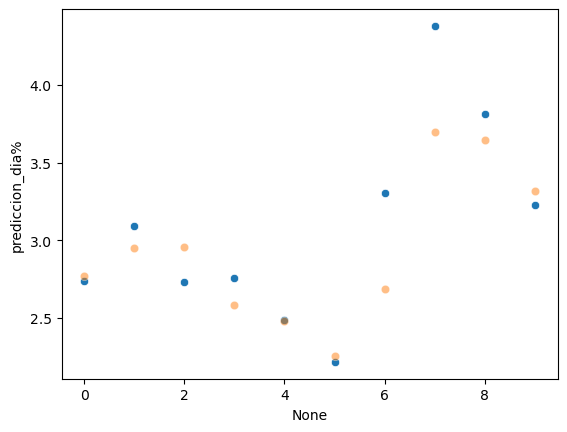

,real,pred,direccion_correcta,dif
0,2.735936,2.769783,True,-0.033847
1,3.094243,2.951306,True,0.142937
2,2.732824,2.954543,True,-0.221719
3,2.757525,2.582178,True,0.175347
4,2.489054,2.481363,True,0.007691
5,2.217814,2.255650,True,-0.037836
6,3.302131,2.684430,True,0.617701
7,4.378485,3.699375,True,0.679110
8,3.809333,3.642686,True,0.166646
9,3.226020,3.314685,True,-0.088665


In [144]:
sns.scatterplot(x=X_outsider.index,y=y_outsider)
sns.scatterplot(x=X_outsider.index,y=predicciones_outsider,alpha=0.5)
plt.show()

comparativa_rf=pd.DataFrame(columns=["real","pred","direccion_correcta"])
comparativa_rf["real"]=y_outsider
comparativa_rf["pred"]=predicciones_outsider
comparativa_rf["dif"]=y_outsider-predicciones_outsider

for i in range(len(comparativa_rf["real"])):
    if ((comparativa_rf["pred"][i] * comparativa_rf["real"][i])>0) :
        comparativa_rf.loc[i,"direccion_correcta"]=True
    elif ((comparativa_rf["pred"][i] * comparativa_rf["real"][i])<0):
        comparativa_rf.loc[i,"direccion_correcta"]=False
comparativa_rf

In [ ]:
df_porcentual

en teoria las derecciones la da bien, eso es un punto a favor, pero debemos mejorar la precision
y testear de forma realista.

FACTORES A CONCIDERAR:
-RELATIVIDAD DE MARGEN(OSEA, QUE TANTO PORCENTAJE DE ERROR HAY CON RESPECTO AL TOTAL DEL MOVIMIENTO)
-CANTIDAD DE ACIERTOS DE DIRECCION
-CALCULAR SOLO CON EL PRIMER DATO DESPUES DEL CONJUNTO DE ENTRENAMIENTO.
-VER QUE CANTIDAD DE DATOS DA LA MEJOR APROXIMACION
-VER TAMBIEN QUE TEMPORALIDAD DE PREDICCION ES MEJOR,INTENTANDO DE QUE SEA CUANTO MUCHO 1 DIA.
PRIMERO DEBO PLANTEAR PARAMETROS, PARA FINALMENTE AVRIAR LA CANTIDAD DE MUESTRAS, PARA PODER VER ASI CUAL MEJORA TODOS LOS INDICADORES.



In [ ]:
#debemos hacer una prueba mas real, simulando ganancias ,perdidas y usos reales.

#SE DEBERIA HACR UNA TABLITA CON LA QUE COMPARAR TODOS LOS RESULTADOS.
#tabla_resultados=pd.DataFrame(columns=["nuemro_muestras","temporalidad","acierto_direccion","error_relativo_aciertos","error_relativo_total","numero de estimmadores"])#debira tener la cantidad de aciertos de direccion, error de medicion en % 





In [474]:
relativ_error=[]
aciertos_direccion_list=[]
error_aciertos_list=[]
y_pred_guardadas=[]
y_real_guardadas=[]
for i in range(100):
    print(i)
    #vamos a separar los datos de entreno y los outsider
    entreno=df_porcentual[55000+i:65000+i]
    
    outsider=df_porcentual[65000+i+1:65000+i+2]
    #print(outsider)
    outsider.reset_index(drop=True,inplace=True)
    entreno.reset_index(drop=True,inplace=True)
    #ahora ponemos el y el x
    X_entreno=entreno.drop(["time","prediccion_4hora%","prediccion_1hora%","48_medias","20_medias","10_medias"],axis=1)
    y=entreno["prediccion_1hora%"]
    X_train, X_test, y_train, y_test = train_test_split(X_entreno, y, test_size=0.001, random_state=42)
    model=RandomForestRegressor( n_estimators=3, random_state=42)
    model.fit(X_train,y_train)
    X_outsider=outsider.drop(["time","prediccion_4hora%","prediccion_1hora%","48_medias","20_medias","10_medias"],axis=1)
    y_outsider=outsider["prediccion_1hora%"]#es el real
    predicciones_outsider=model.predict(X_outsider)
    #print(y_outsider[0])
    y_pred_guardadas.append(predicciones_outsider[0])
    y_real_guardadas.append(y_outsider[0])
    error_relativo_porcentual=abs(y_outsider[0]-predicciones_outsider)/y_outsider[0]
    relativ_error.append(error_relativo_porcentual)
    if y_outsider[0]*predicciones_outsider>0:
        aciertos_direccion_list.append(predicciones_outsider)
        error_relativo_aciertos=abs(y_outsider[0]-predicciones_outsider)/y_outsider[0]
        error_aciertos_list.append(error_relativo_aciertos)

error_total=abs(np.array(relativ_error).sum())/len(relativ_error)
aciertos_direccion=len(aciertos_direccion_list)
error_aciertos=abs(np.array(error_aciertos_list).sum())/len(error_aciertos_list)


0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99


In [476]:
tabla_resultados=pd.DataFrame(columns=["error_total","error_aciertos","aciertos_direccion"])
tabla_resultados["error_total"]=error_total
tabla_resultados["error_aciertos"]=error_aciertos
tabla_resultados["aciertos_direccion"]=aciertos_direccion
print(f'error_aciertos: {error_aciertos}')
print(f'n_aciertos: {aciertos_direccion/len(relativ_error)}')
print(f'error total: {error_total}')


error_aciertos: 1.0728161980095143
n_aciertos: 0.51
error total: 1.3259676416661852


In [477]:
mayor=[]
for i in error_aciertos_list:
    if 0 < abs(i) < 1:
        mayor.append(i)
len(mayor)
# print(len(error_aciertos_list))

44

<Axes: xlabel='None', ylabel='real'>

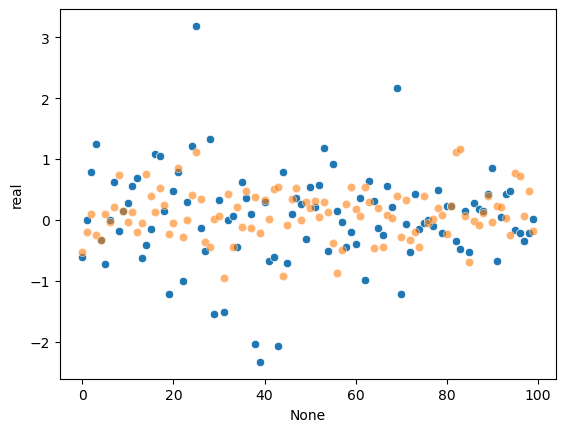

In [478]:
guardados=pd.DataFrame(columns=["real","prediccion"])
guardados["real"]=y_real_guardadas
guardados["predicciones"]=y_pred_guardadas
sns.scatterplot(guardados,x=guardados.index,y=guardados["real"])
sns.scatterplot(guardados,x=guardados.index,y="predicciones",alpha=0.6)